**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля
-4 балла после 06:00 10 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

##### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -0.5 баллов
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -0.5 баллов


In [5]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata, fetch_openml
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from scipy.spatial import distance_matrix
%load_ext pycodestyle_magic

In [9]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.leaf_size = 30

    def fit(self, X, y):
        self._y = np.asarray(y)
        self.labels = np.unique(y)
        if self.algorithm == 'brute':
            self._fit_X = np.asarray(X, dtype=np.float64)
        elif self.algorithm == 'kd_tree':
            self._tree = KDTree(X, leaf_size=self.leaf_size)
        return self

    def predict_brute_proba(self, x):
        dist = np.sum((self._fit_X - x) ** 2, axis=1) ** 0.5
        labels = self._y[np.argsort(dist)[:self.n_neighbors]]
        return np.bincount(labels, minlength=len(self.labels))

    def predict(self, X):
        n_neighbors = self.n_neighbors
        _y = self._y
        if self.algorithm == 'brute':
            res = np.zeros(X.shape[0], dtype=_y.dtype)
            _fit_X = self._fit_X
            for i, x in enumerate(X):
                res[i] = self.predict_brute_proba(x).argmax()
            return res
        elif self.algorithm == 'kd_tree':
            distances, ind = self._tree.query(X, n_neighbors)
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(),
                                   1, _y[ind])

    def predict_proba(self, X):
        n_neighbors = self.n_neighbors
        _y = self._y
        n_samples = X.shape[0]
        labels = self.labels
        if self.algorithm == 'brute':
            _fit_X = self._fit_X
            res = np.zeros((n_samples, len(labels)), dtype=np.float64)
            for i, x in enumerate(X):
                res[i] = self.predict_brute_proba(x) / n_neighbors
            return res
        elif self.algorithm == 'kd_tree':
            distances, ind = self._tree.query(X, n_neighbors)
            res = []
            for i in ind:
                res.append(np.bincount(_y[i],
                                       minlength=len(labels))
                           / n_neighbors)
            return np.asarray(res)

    def score(self, X, y):
        predicted = self.predict(X)
        return np.mean(predicted == y)


**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
%time clf.fit(X_train, y_train)

Wall time: 0 ns


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


MyKNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [8]:
%time clf.predict(X_test)

Wall time: 0 ns


array([0, 1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 0, 1, 0, 0])

In [9]:
%time my_clf.predict(X_test)

Wall time: 0 ns


array([0, 1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 0, 1, 0, 0])

In [10]:
%time clf.predict_proba(X_test)

Wall time: 0 ns


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [11]:
%time my_clf.predict_proba(X_test)

Wall time: 0 ns


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [12]:
clf.score(X_test, y_test)

1.0

In [13]:
my_clf.score(X_test, y_test)

1.0

Задание 3

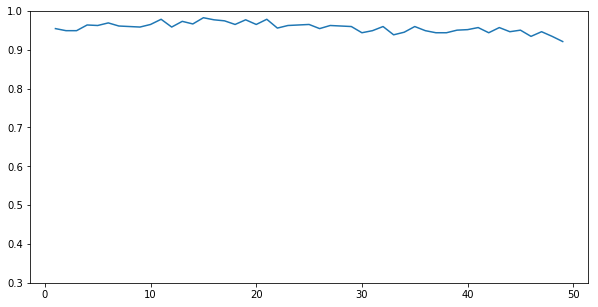

15


In [14]:


iris = datasets.load_iris()
loops = 50
max_neighbors = 50
min_neighbors = 1
scores = np.zeros((max_neighbors))

for i in range(min_neighbors, max_neighbors):
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute')
    for j in range(loops):
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
        my_clf.fit(X_train, y_train)
        scores[i] += my_clf.score(X_test, y_test)
    scores[i] /= loops
    
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
ax1.set_ylim(0.3, 1)
plt.plot(np.arange(min_neighbors, max_neighbors), scores[min_neighbors:])
plt.show()

print(np.argmax(scores))

**MNIST**

In [10]:
mnist = fetch_openml('mnist_784')
#mnist = fetch_mldata('MNIST original')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [13]:
%time clf.fit(X_train, y_train)

CPU times: user 61.5 ms, sys: 57 µs, total: 61.6 ms
Wall time: 60.2 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [14]:
%time my_clf.fit(X_train, y_train)

CPU times: user 2.26 ms, sys: 19 µs, total: 2.28 ms
Wall time: 1.7 ms


MyKNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [15]:
%time clf.predict(X_test)

CPU times: user 3.8 s, sys: 482 ms, total: 4.28 s
Wall time: 1.5 s


array([9, 3, 0, 0, 3, 2, 5, 4, 2, 3, 3, 6, 1, 9, 4, 2, 1, 8, 8, 9, 0, 5,
       1, 4, 0, 1, 1, 5, 0, 0, 5, 8, 2, 3, 8, 1, 7, 1, 6, 2, 2, 7, 9, 1,
       5, 2, 8, 5, 2, 4, 7, 4, 6, 4, 8, 4, 3, 8, 0, 0, 8, 6, 4, 7, 1, 4,
       3, 7, 1, 9, 7, 7, 8, 5, 5, 3, 9, 9, 2, 9, 6, 2, 5, 9, 9, 3, 3, 1,
       2, 6, 8, 3, 3, 4, 7, 3, 9, 1, 4, 2, 4, 7, 6, 7, 1, 2, 4, 0, 6, 0,
       3, 8, 9, 6, 2, 3, 0, 4, 6, 1, 0, 1, 3, 5, 7, 8, 2, 0, 0, 1, 5, 8,
       0, 8, 4, 0, 6, 4, 3, 7, 9, 8, 9, 4, 4, 7, 9, 5, 6, 8, 6, 3, 6, 2,
       2, 5, 1, 6, 8, 7, 1, 6, 4, 9, 0, 6, 6, 7, 0, 6, 4, 8, 3, 1, 2, 2,
       9, 0, 3, 0, 3, 3, 0, 4, 6, 6, 4, 0, 7, 1, 4, 1, 5, 2, 7, 8, 5, 5,
       1, 3, 9, 0, 2, 1, 3, 9, 6, 7, 8, 3, 2, 1, 5, 1, 2, 4, 5, 7, 5, 5,
       8, 8, 8, 8, 3, 3, 7, 4, 3, 0, 2, 0, 0, 8, 1, 8, 9, 9, 0, 4, 4, 2,
       5, 2, 1, 3, 7, 7, 9, 3, 4, 9, 1, 0, 7, 7, 0, 3, 6, 6, 3, 5, 7, 5,
       8, 2, 9, 7, 9, 5, 3, 3, 5, 9, 7, 2, 1, 9, 3, 1, 9, 5, 1, 3, 2, 1,
       3, 0, 3, 2, 6, 9, 8, 3, 5, 7, 2, 2, 1, 5, 4,

In [16]:
%time my_clf.predict(X_test)

CPU times: user 1min 43s, sys: 1min 6s, total: 2min 50s
Wall time: 2min 50s


array([9, 3, 0, 0, 3, 2, 5, 4, 2, 3, 3, 6, 1, 9, 4, 2, 1, 8, 8, 9, 0, 5,
       1, 4, 0, 1, 1, 5, 0, 0, 5, 8, 2, 3, 8, 1, 7, 1, 6, 2, 2, 7, 9, 1,
       5, 2, 8, 5, 2, 4, 7, 4, 6, 4, 8, 4, 3, 8, 0, 0, 8, 6, 4, 7, 1, 4,
       3, 7, 1, 9, 7, 7, 8, 5, 5, 3, 9, 9, 2, 9, 6, 2, 5, 9, 9, 3, 3, 1,
       2, 6, 8, 3, 3, 4, 7, 3, 9, 1, 4, 2, 4, 7, 6, 7, 1, 2, 4, 0, 6, 0,
       3, 8, 9, 6, 2, 3, 0, 4, 6, 1, 0, 1, 3, 5, 7, 8, 2, 0, 0, 1, 5, 8,
       0, 8, 4, 0, 6, 4, 3, 7, 9, 8, 9, 4, 4, 7, 9, 5, 6, 8, 6, 3, 6, 2,
       2, 5, 1, 6, 8, 7, 1, 6, 4, 9, 0, 6, 6, 7, 0, 6, 4, 8, 3, 1, 2, 2,
       9, 0, 3, 0, 3, 3, 0, 4, 6, 6, 4, 0, 7, 1, 4, 1, 5, 2, 7, 8, 5, 5,
       1, 3, 9, 0, 2, 1, 3, 9, 6, 7, 8, 3, 2, 1, 5, 1, 2, 4, 5, 7, 5, 5,
       8, 8, 8, 8, 3, 3, 7, 4, 3, 0, 2, 0, 0, 8, 1, 8, 9, 9, 0, 4, 4, 2,
       5, 2, 1, 3, 7, 7, 9, 3, 4, 9, 1, 0, 7, 7, 0, 3, 6, 6, 3, 5, 7, 5,
       8, 2, 9, 7, 9, 5, 3, 3, 5, 9, 7, 2, 1, 9, 3, 1, 9, 5, 1, 3, 2, 1,
       3, 0, 3, 2, 6, 9, 8, 3, 5, 7, 2, 2, 1, 5, 4,

In [18]:
%time clf.predict_proba(X_test)

CPU times: user 3.7 s, sys: 439 ms, total: 4.14 s
Wall time: 1.44 s


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [17]:
%time my_clf.predict_proba(X_test)

CPU times: user 1min 45s, sys: 1min 6s, total: 2min 51s
Wall time: 2min 51s


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [24]:
clf.score(X_test, y_test)

0.9742857142857143

In [25]:
my_clf.score(X_test, y_test)

0.9742857142857143

Задание 4

In [38]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [39]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [40]:
%time clf.fit(X_train, y_train)

Wall time: 21.8 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [41]:
%time my_clf.fit(X_train, y_train)

Wall time: 21.4 s


MyKNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [42]:
%time clf.predict(X_test)

Wall time: 59.7 s


array([8, 3, 1, 3, 7, 6, 9, 7, 8, 8, 7, 8, 3, 7, 7, 4, 0, 6, 6, 6, 3, 4,
       3, 8, 1, 4, 7, 2, 3, 8, 2, 8, 4, 4, 4, 0, 0, 2, 6, 0, 1, 2, 3, 7,
       7, 9, 4, 9, 3, 6, 1, 9, 0, 5, 3, 1, 9, 6, 0, 0, 9, 5, 0, 3, 7, 9,
       8, 4, 2, 7, 0, 0, 5, 1, 5, 0, 9, 8, 8, 2, 6, 7, 1, 5, 7, 1, 5, 0,
       4, 8, 9, 7, 7, 9, 2, 3, 6, 1, 0, 8, 1, 7, 2, 0, 7, 8, 9, 4, 8, 5,
       7, 7, 0, 7, 1, 3, 9, 8, 3, 1, 5, 1, 1, 6, 8, 7, 2, 4, 9, 9, 8, 0,
       8, 6, 2, 8, 6, 5, 1, 4, 9, 5, 0, 7, 5, 1, 0, 6, 8, 6, 2, 3, 3, 4,
       0, 1, 9, 0, 4, 0, 6, 1, 0, 3, 3, 3, 2, 4, 1, 3, 7, 6, 9, 4, 4, 7,
       1, 6, 4, 9, 7, 3, 8, 6, 1, 2, 5, 5, 5, 3, 3, 2, 2, 1, 1, 6, 6, 1,
       5, 0, 9, 8, 0, 4, 1, 6, 7, 3, 3, 4, 2, 0, 1, 0, 1, 5, 9, 7, 8, 4,
       0, 4, 2, 5, 5, 6, 6, 3, 1, 6, 4, 1, 0, 8, 1, 0, 5, 0, 7, 0, 1, 3,
       3, 2, 6, 1, 3, 3, 8, 2, 6, 6, 7, 2, 7, 7, 3, 4, 8, 1, 4, 1, 3, 5,
       9, 0, 0, 7, 9, 1, 7, 8, 5, 4, 5, 1, 9, 8, 2, 9, 4, 7, 9, 1, 0, 0,
       9, 2, 3, 1, 0, 6, 2, 3, 5, 2, 6, 2, 2, 5, 4,

In [43]:
%time my_clf.predict(X_test)

Wall time: 1min


array([8, 3, 1, 3, 7, 6, 9, 7, 8, 8, 7, 8, 3, 7, 7, 4, 0, 6, 6, 6, 3, 4,
       3, 8, 1, 4, 7, 2, 3, 8, 2, 8, 4, 4, 4, 0, 0, 2, 6, 0, 1, 2, 3, 7,
       7, 9, 4, 9, 3, 6, 1, 9, 0, 5, 3, 1, 9, 6, 0, 0, 9, 5, 0, 3, 7, 9,
       8, 4, 2, 7, 0, 0, 5, 1, 5, 0, 9, 8, 8, 2, 6, 7, 1, 5, 7, 1, 5, 0,
       4, 8, 9, 7, 7, 9, 2, 3, 6, 1, 0, 8, 1, 7, 2, 0, 7, 8, 9, 4, 8, 5,
       7, 7, 0, 7, 1, 3, 9, 8, 3, 1, 5, 1, 1, 6, 8, 7, 2, 4, 9, 9, 8, 0,
       8, 6, 2, 8, 6, 5, 1, 4, 9, 5, 0, 7, 5, 1, 0, 6, 8, 6, 2, 3, 3, 4,
       0, 1, 9, 0, 4, 0, 6, 1, 0, 3, 3, 3, 2, 4, 1, 3, 7, 6, 9, 4, 4, 7,
       1, 6, 4, 9, 7, 3, 8, 6, 1, 2, 5, 5, 5, 3, 3, 2, 2, 1, 1, 6, 6, 1,
       5, 0, 9, 8, 0, 4, 1, 6, 7, 3, 3, 4, 2, 0, 1, 0, 1, 5, 9, 7, 8, 4,
       0, 4, 2, 5, 5, 6, 6, 3, 1, 6, 4, 1, 0, 8, 1, 0, 5, 0, 7, 0, 1, 3,
       3, 2, 6, 1, 3, 3, 8, 2, 6, 6, 7, 2, 7, 7, 3, 4, 8, 1, 4, 1, 3, 5,
       9, 0, 0, 7, 9, 1, 7, 8, 5, 4, 5, 1, 9, 8, 2, 9, 4, 7, 9, 1, 0, 0,
       9, 2, 3, 1, 0, 6, 2, 3, 5, 2, 6, 2, 2, 5, 4,

In [44]:
%time clf.predict_proba(X_test)

Wall time: 1min 2s


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [45]:
%time my_clf.predict_proba(X_test)

Wall time: 1min 6s


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [46]:
clf.score(X_test, y_test)

0.9728571428571429

In [47]:
my_clf.score(X_test, y_test)

0.9728571428571429

Задание 5

In [36]:
# seaborn - визализация данных(основан на matplotlib)
# matplotlib - создание графиков(визуализация данных)
# train_test_split - разделение данных на обучающую часть и тесты
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) конвейер преобразований оканчивающийся оценочной функцией
# StandardScaler (from sklearn.preprocessing import StandardScaler) - предобработка данных, сдвигая их 
# на средние значение и масштабирование (деление на дисперсию)
# ClassifierMixin - общий класс для всех классификаторов
# NeighborsBase - базовый класс для всех KNN
# KNeighborsMixin - базовый класс для поиска K соседей
# SupervisedIntegerMixin - класс для проверки типа входных данных и последующему обучению им модели